<a href="https://colab.research.google.com/github/cassiomatheus/Fundamentos-de-Inteligencia-Computacional/blob/master/Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Questão 1

- Faça plotes similares as duas figuras mostradas nos dois próximos slides.

- Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira.

- Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress.

- Calcule a covariância e interprete os resultados.

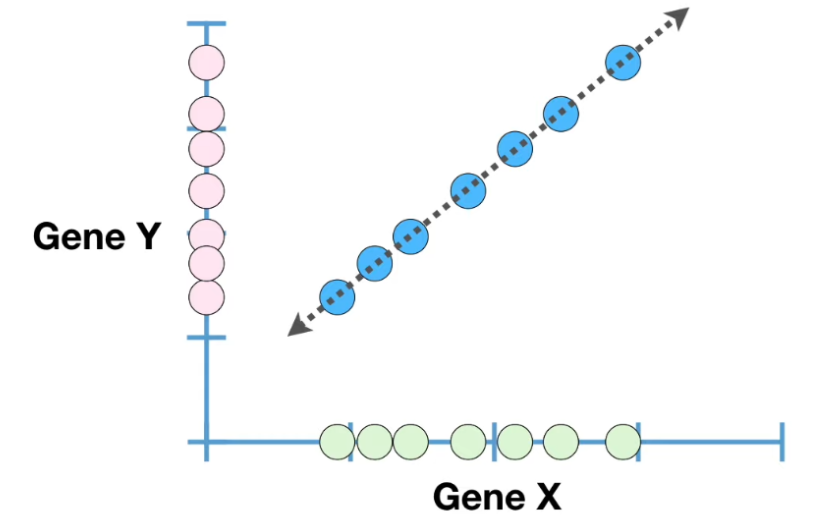

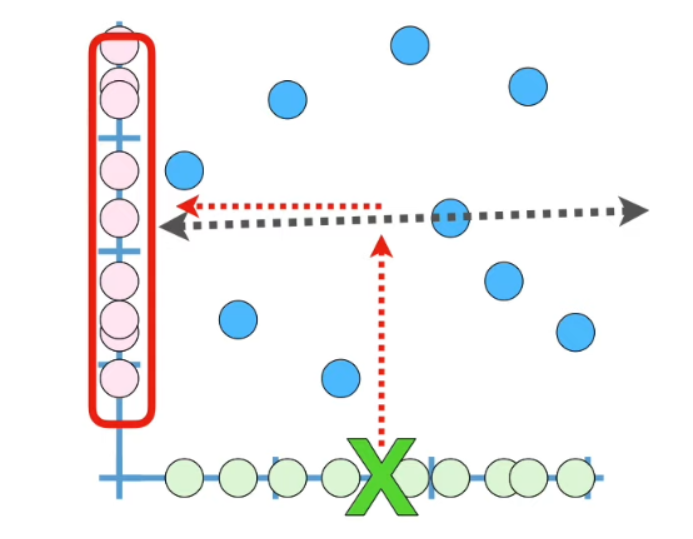

In [93]:
from IPython.display import Image, display

display(Image("/content/Fig 1.png"))
print(" ")
display(Image("/content/Fig 2.png"))

A função `linregress` da biblioteca **SciPy** (em `scipy.stats`) serve para calcular uma **regressão linear simples** entre duas variáveis. Basicamente, ela tenta ajustar a **melhor linha reta possível** a um conjunto de dados `(x, y)`.

#### Retorna cinco valores principais:

- **`slope` (inclinação):**  
  Indica o quanto `y` muda para cada unidade de aumento em `x`.

- **`intercept` (intercepto):**  
  Valor de `y` quando `x = 0`; ou seja, onde a linha cruza o eixo y.

- **`rvalue` (coeficiente de correlação):**  
  Mede a força e a direção da relação linear, variando de -1 a +1.  
  Valores próximos de 1 ou -1 indicam forte correlação; próximos de 0 indicam fraca correlação.

- **`pvalue` (valor-p):**  
  Testa se a inclinação é significativamente diferente de zero.  
  Um valor pequeno (geralmente < 0.05) indica que a relação é **estatisticamente significativa**.

- **`stderr` (erro padrão):**  
  Mede a precisão da estimativa da inclinação.

---

### Funcionalidade:

- Identificar e quantificar **tendências lineares** entre duas variáveis.
- Avaliar a **força** e a **significância estatística** da relação.
- Fazer **previsões simples** com base em um modelo linear.

In [126]:
# Impotação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Primeiramente, vamos plotar a primeira imagem, onde é possível observar que uma variável é 100% explicada pela outra. Em outras palavras, a variável y é igual à variável x, ou seja, y = x.

Para representar essa relação na imagem, os vetores x e y terão os mesmos valores, conforme mostrado abaixo.

In [127]:
# Gerar 9 pontos da variavel x. Sendo que para ter 100 de explicabilidade a vaviravel x tem que ser igual a y, portanto x=y
x = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

A função `np.cov(x, y)` retorna a **matriz de covariância** entre `x` e `y`.

Essa matriz é 2x2, com o seguinte formato:

$$
\text{np.cov}(x, y) =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
$$

Como `Cov(x, y) = Cov(y, x)`, a matriz é **simétrica**.

O elemento `[0, 1]` da matriz refere-se à **1ª linha e 2ª coluna**, ou seja, o valor da **covariância entre `x` e `y`**.

---

### O que é covariância?

A **covariância** mede **como duas variáveis variam juntas**:

- Se `x` e `y` aumentam juntos → **covariância positiva**
- Se uma aumenta enquanto a outra diminui → **covariância negativa**
- Se são independentes (sem relação linear) → **covariância próxima de zero**

No caso abaixo a covariância foi positiva, portanto o valor de uma variavel cresce a medida que o valor da outra variavel tambem cresce, além disso é possivel ver no grafico abaixo.

In [128]:
# Calcular correlação de Pearson
correlation, _ = pearsonr(x, y)

# Calcular a reta de regressão para os pontos (x, y_random)
regression = linregress(x, y)
slope, intercept, r_value, p_value, std_err = regression

# Calcular a covariância entre x e y_random
covariance = np.cov(x, y)[0,1]

print(f"P-Value: {p_value}")
print(f"Covariância (X, Y): {covariance}")
print(f'Correlação de Pearson: {correlation:.4f}')
print(f"R²: {r_value:.4f}")

P-Value: 3.292585384803146e-70
Covariância (X, Y): 7.5
Correlação de Pearson: 1.0000
R²: 1.0000


Considerando que:

- Hipótese nula (H₀): não há correlação (slope = 0)

- Hipótese alternativa (H₁): há correlação (slope ≠ 0)

Porem o p-valor de 3.29e-70 indica que a relação entre x e y é estatisticamente extremamente significativa, já que x e y são iguais. Alem disso mostra que a chance de isso ter ocorrido por acaso é zero.

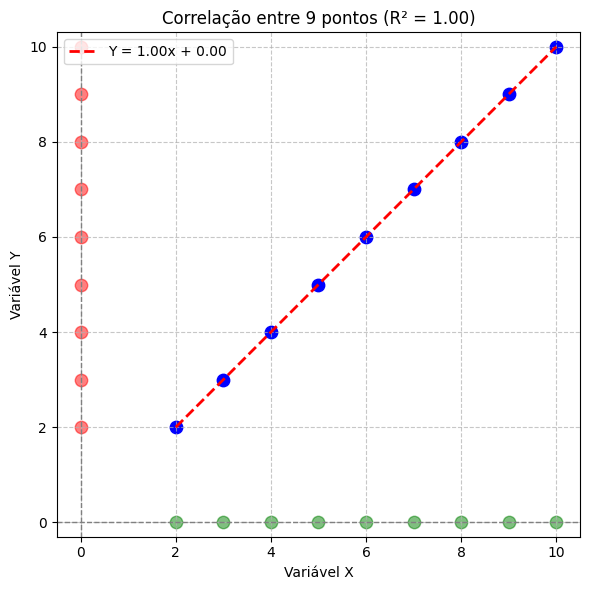

In [129]:
# Plotar gráfico
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', s=80,) #label='Pontos (x, y)')
plt.scatter(x, np.zeros_like(x), color='green', s=80, alpha=0.5,) #label='Pontos no eixo X')
plt.scatter(np.zeros_like(y), y, color='red', s=80, alpha=0.5,) #label='Pontos no eixo Y')
plt.plot(x, y, color='red', linewidth=2, linestyle='--', label=f'Y = {slope:.2f}x + {intercept:.2f}') #label='Reta de tendência (y = x)')

plt.title(f'Correlação entre {len(x)} pontos (R² = {r_value:.2f})')
plt.xlabel('Variável X')
plt.ylabel('Variável Y')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='gray', linewidth=1, linestyle='--')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [130]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

In [131]:
# Gerando 9 pontos da variavel x
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

np.random.seed(42)
# Gerarndo a segunda variavel y aleatório
y_random = np.random.uniform(low=min(x), high=max(x), size=len(x))

- Para a segunda imagem é possível observar que uma variável não explica a outra. Em outras palavras, a correlação entre a variável y e a variável x é o ou quase zero.

- Para representar essa relação de independecia entre variaveis na imagem, os vetores x e y serão diferentes, porém os valores de y serão contido entre o intervalo de x (2 <= x <= 10) como foi solicitado na questão.

In [137]:
# Calcular correlação de Pearson
correlation, _ = pearsonr(x, y_random)

# Calcular a reta de regressão para os pontos (x, y_random)
regression = linregress(x, y_random)
slope, intercept, r_value, p_value, std_err = regression

# Calcular a covariância entre x e y_random
covariance = np.cov(x, y_random)[0, 1]

print(f"P-Value: {p_value:.4f}")
print(f"Covariância (X, Y): {covariance:.4f}")
print(f'Correlação de Pearson: {correlation:.4f}')

P-Value: 0.6838
Covariância (X, Y): -1.1378
Correlação de Pearson: -0.1585


Podemos observar que há uma correlação negativa fraca entre X e Y, indicando uma leve tendência de que Y diminui quando X aumenta. No entanto, essa relação é muito sutil, como mostram a covariância de -1.1378 e a correlação de -0.1585. Além disso, o valor de p-value = 0.6838 indica que essa correlação não é estatisticamente significativa. Ou seja, a relação observada entre X e Y pode ter ocorrido por acaso. Concluímos, portanto, que não há evidência estatística sólida de uma relação linear real entre essas variáveis.

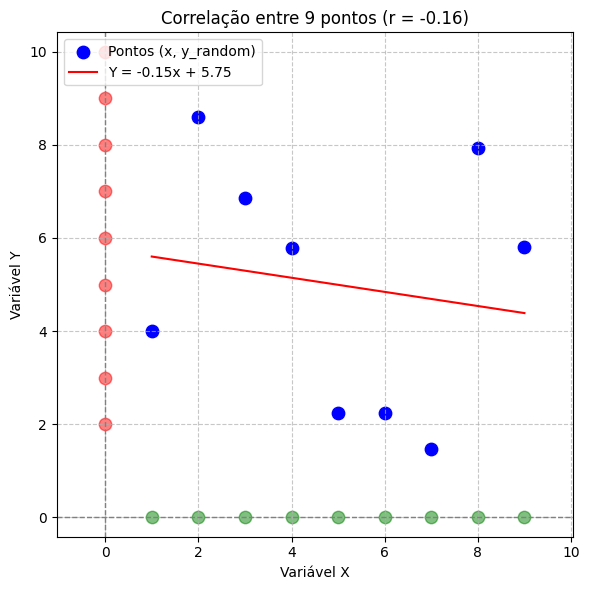

In [138]:
# Plotar gráfico
plt.figure(figsize=(6, 6))

plt.scatter(x, np.zeros_like(x), color='green', s=80, alpha=0.5,) #label='Pontos no eixo X')
plt.scatter(np.zeros_like(y), y, color='red', s=80, alpha=0.5,) #label='Pontos no eixo Y')

plt.scatter(x, y_random, color='blue', s=80, label='Pontos (x, y_random)')
plt.plot(x, slope * x + intercept, color='red', linestyle='-', label=f'Y = {slope:.2f}x + {intercept:.2f}')

plt.title(f'Correlação entre {len(x)} pontos (r = {r_value:.2f})')
plt.xlabel('Variável X')
plt.ylabel('Variável Y')
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.axvline(0, color='gray', linewidth=1, linestyle='--')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Exibir resultados
#print(f'Correlação de Pearson (Perfeita): {correlation:.4f}')
#print("\nRegressão Linear para (x, y_random):")
#print(f'Covariância (X, Y Random): {covariance:.4f}')
#print(f"Slope (Inclinação): {slope:.4f}")
#print(f"Intercept (Intercepção): {intercept:.4f}")
#print(f"R²: {r_value ** 2:.4f}")
#print(f"P-Value: {p_value:.4f}")
#print(f"Erro Padrão: {std_err:.4f}")

### Questão 2

- Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

- Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:
 - Calcular a média e o desvio padrão da amostra.
 - Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.
- Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

- Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.


In [140]:
# Importando biblioteca
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Para a atividade foram definidos os parametros de:
- Variavel de interesse = pesos de indivíduos
- Média = 70kg
- Desvio Padrão = 10kg
- Nº de amostras = 100

In [ ]:
# Gerar dados amostrais (pesos de indivíduos em kg)
np.random.seed(42)
dados = np.random.normal(70, 10, 100)  # Média = 70kg; Desvio Padrão = 10kg; Nº de amostras = 100

Para calcular o intervalo de confiança da média da amostra usamos é utilizado o erro padrão da média (SEM - Standard Error of the Mean). Fórmula do Erro Padrão da Média (SEM - Standard Error of the Mean):

$$
SEM = \frac{SD}{\sqrt{n}}
$$

### Onde:
- \( SEM \) = Erro Padrão da Média.  
- \( SD \) = Desvio Padrão da Amostra.  
- \( n \) = Tamanho da Amostra.

Alem disso é utilizado também o Valor Crítico na Distribuição t de Student

## Como Funciona a Fórmula

### 1. Distribuição t:
- Utilizamos a função `ppf` (**Percent Point Function**) da distribuição t de Student:
```python
stats.t.ppf(probabilidade, graus_de_liberdade)

### Onde:
- \( Probabilidade \) = (1 + confianca) / 2; Para um intervalo de confiança bilateral, a probabilidade é dividida em duas metades.
- \( Graus de Liberdade: \) = len(dados) - 1; O número de graus de liberdade é igual ao tamanho da amostra menos um (𝑛−
1)


In [ ]:
# Função para calcular intervalo de confiança
def intervalo_confianca(dados, confianca=0.95):
    media = np.mean(dados)
    erro_padrao = stats.sem(dados)  # erro padrão da média
    valor_critico = stats.t.ppf((1 + confianca) / 2, len(dados) - 1)
    margem = erro_padrao * valor_critico
    return media - margem, media + margem

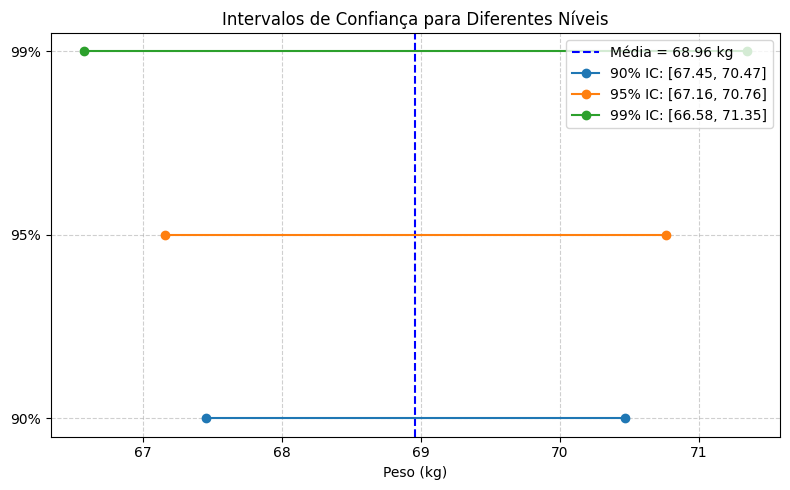

In [147]:
# Lista com os diferentes níveis de confiança que queremos analisar
niveis_confianca = [0.90, 0.95, 0.99]

# Lista para armazenar os intervalos de confiança correspondentes
intervalos = []

# Calcula o intervalo de confiança para cada nível e armazena
for nivel in niveis_confianca:
    intervalo = intervalo_confianca(dados, nivel)  # chama a função definida anteriormente
    intervalos.append(intervalo)

# Início da visualização gráfica
plt.figure(figsize=(8, 5))  # define o tamanho do gráfico

# Calcula a média dos dados para exibir no gráfico
media_amostral = np.mean(dados)

# Linha vertical indicando a média
plt.axvline(media_amostral, color='blue', linestyle='--', label=f'Média = {media_amostral:.2f} kg')

# Plotar cada intervalo de confiança horizontalmente no gráfico
for indice in range(len(niveis_confianca)):
    nivel = niveis_confianca[indice]               # nível de confiança (ex: 0.90)
    intervalo = intervalos[indice]                 # intervalo correspondente (inferior, superior)
    limite_inferior = intervalo[0]
    limite_superior = intervalo[1]

    # Plotar uma linha entre o limite inferior e superior, no nível correspondente
    plt.plot([limite_inferior, limite_superior],  # eixo x (intervalo)
             [indice, indice],                    # eixo y (posição vertical)
             'o-',                                 # estilo dos pontos e linha
             label=f'{int(nivel * 100)}% IC: [{limite_inferior:.2f}, {limite_superior:.2f}]')

# Título e rótulos
plt.title('Intervalos de Confiança para Diferentes Níveis')
plt.xlabel('Peso (kg)')

# Rótulos no eixo Y indicam os níveis de confiança
plt.yticks(ticks=range(len(niveis_confianca)), labels=[f'{int(n * 100)}%' for n in niveis_confianca])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout() # Ajusta o layout para não cortar nada
plt.show()

### Questão 3

- Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste.
- Formule a hipótese nula.
Realizar um teste t de duas amostras usando scipy.stats.ttest_ind.
- Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um nível de significância dado (por exemplo, 0,05).

In [148]:
# Importando bibliotecas
import numpy as np
from scipy import stats

In [149]:
# Gerando os dados para os dois grupos(Controle e Teste)
np.random.seed(42)
grupo_controle = np.random.normal(70, 10, 100)
grupo_teste = np.random.normal(74, 10, 100)

# Selecionar 2 amostras distintas
amostra1, amostra2 = np.random.choice(grupo_teste, size=2, replace=False)

As hipotese implementadas foram:

**Hipótese Nula (H₀):** A média do grupo controle é igual à média do grupo teste.

**Hipótese Alternativa (H₁)**: As médias são diferentes.

In [150]:
# Teste t para amostra1 vs controle
t_stat, p_value = stats.ttest_ind(grupo_controle, [amostra1])  # Note: amostra1 é um único valor!
print(f"Amostra 1: {amostra1:.4f}, P-valor: {p_value:.4f}")

# Teste t para amostra2 vs controle
t_stat1, p_value1 = stats.ttest_ind(grupo_controle, [amostra2])
print(f"Amostra 2: {amostra2:.4f}, P-valor: {p_value1:.4f}")

Amostra 1: 61.5426, P-valor: 0.4183
Amostra 2: 74.9965, P-valor: 0.5100


In [151]:
# Interpretação correta
alpha = 0.05
resultado1 = "Rejeitar H0" if p_value < alpha else "Não Rejeitar H0"
resultado2 = "Rejeitar H0" if p_value1 < alpha else "Não Rejeitar H0"

print(f"\nDecisão para Amostra 1: {resultado1}")
print(f"Decisão para Amostra 2: {resultado2}")


Decisão para Amostra 1: Não Rejeitar H0
Decisão para Amostra 2: Não Rejeitar H0


Como foi possivel ver nos dois resultados o valor de p-value foi maior que o limiar de 0,05 ou 5%, portanto não é possivel rejeitar a hipotese nula que a média do grupo controle é igual à média do grupo teste com as duas amostras selecionadas.

### Questão 4

- Faça slides explicando o código abaixo e interpretando os resultados

- Teste com dois valores para significance_level
- Pelo menos quatro slides com a explicação e interpretação.




- O parâmetro significance_level define o limiar para rejeitar a hipótese nula. Ele representa a probabilidade máxima de cometer um erro tipo I — isto é, rejeitar a hipótese nula quando ela é verdadeira (falso positivo).

Link para os slides: [Link para slides](https://docs.google.com/presentation/d/1xImAxhjNxUHnZVilIBkKzViP7PKfS2sHjx_raJyuBKc/edit?usp=sharing)

In [175]:
# Importando bibliotecas
import numpy as np
from scipy.stats import ttest_ind

In [176]:
#Variaveis
num_simulations = 10000         # Número de simulações
sample_size = 30                # Tamanho de cada grupo amostrado
true_mean = 50                  # Média verdadeira das populações
true_std = 10                   # Desvio padrão verdadeiro
significance_level = 0.01       # limite para rejeitar a hipótese nula com o limiar de 1%
significance_level1 = 0.05      # limite para rejeitar a hipótese nula com o limiar de 5%
significant_results = 0         # Contador de falsos positivos

In [177]:
#Executa 10.000 vezes o seguinte experimento:
for _ in range(num_simulations):

    #Gera duas amostras aleatórias (independentes), ambas com média = 50 e desvio padrão = 10.
    #O tamanho da amostra é 30 para cada grupo.
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    # Aplica o teste t bilateral para comparar as médias das duas amostras.
    #Retorna o estatístico t e o p-valor.
    t_stat, p_value = ttest_ind(group1, group2)

    #Verifica se o resultado é significativo
    if p_value < significance_level:
        significant_results += 1


#Cálculo final da taxa de erro tipo I
proportion_significant = significant_results / num_simulations
# Calcula a proporção de testes que deram "significativo", ou seja, a taxa de falsos positivos observada.
# Espera-se que essa proporção seja próxima de significance_level, já que a hipótese nula é verdadeira.


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Number of simulations: 10000
Significance level (alpha): 0.01
Proportion of significant results (Type I error rate): 0.0100


In [178]:
#Executa 10.000 vezes o seguinte experimento:
for _ in range(num_simulations):

    #Gera duas amostras aleatórias (independentes), ambas com média = 50 e desvio padrão = 10.
    #O tamanho da amostra é 30 para cada grupo.
    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    # Aplica o teste t bilateral para comparar as médias das duas amostras.
    #Retorna o estatístico t e o p-valor.
    t_stat, p_value = ttest_ind(group1, group2)

    #Verifica se o resultado é significativo
    if p_value < significance_level1:
        significant_results += 1


#Cálculo final da taxa de erro tipo I
proportion_significant = significant_results / num_simulations
# Calcula a proporção de testes que deram "significativo", ou seja, a taxa de falsos positivos observada.
# Espera-se que essa proporção seja próxima de significance_level1, já que a hipótese nula é verdadeira.


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level1}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Number of simulations: 10000
Significance level (alpha): 0.05
Proportion of significant results (Type I error rate): 0.0605


### Questão 5

- Reproduza em Python o conteúdo dos slides de 24 a 46.

In [179]:
#Importando biblioteca
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Dados extraidos das imagens para a Media da população
n = 50                      # Tamanho da amostra
media_amostral = 75.9       # Media da amostra
desvio_amostral = 13.37     # Desvio padrão da amostra
z = 2.0096                  # Valor z para o nível de confiança de 95%

Erro padrão: 1.8908
Intervalo de confiança (95%): [72.1002, 79.6998]


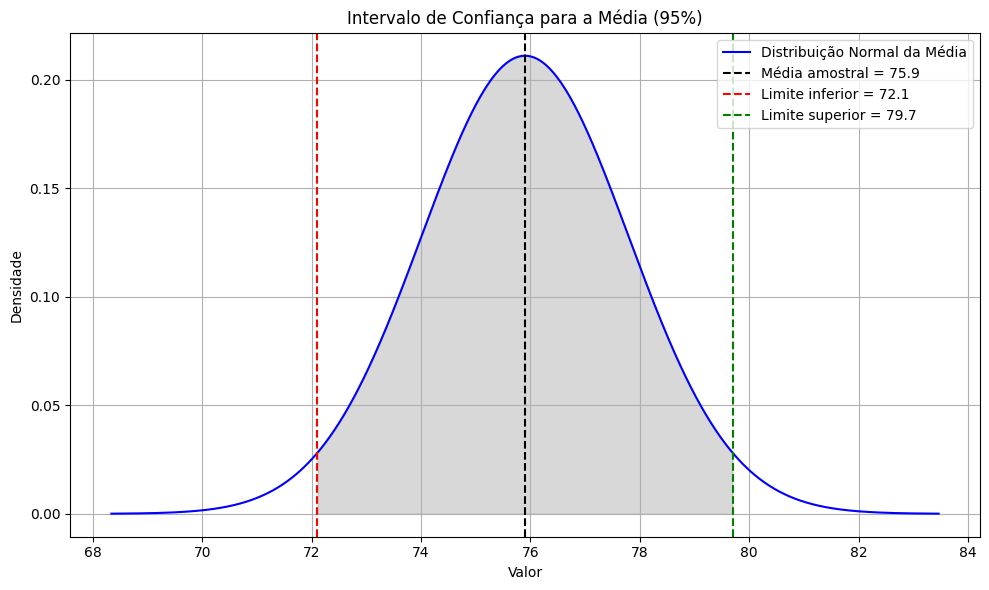

In [ ]:
# Cálculo do erro padrão
erro_padrao = desvio_amostral / math.sqrt(n)

# Cálculo dos limites do intervalo de confiança
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Exibição dos valores calculados
print(f"Erro padrão: {erro_padrao:.4f}")
print(f"Intervalo de confiança (95%): [{limite_inferior:.4f}, {limite_superior:.4f}]")

# Plot da distribuição normal com IC
x_vals = np.linspace(media_amostral - 4*erro_padrao, media_amostral + 4*erro_padrao, 1000)
y_vals = (1 / (erro_padrao * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - media_amostral)/erro_padrao)**2)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Distribuição Normal da Média', color='blue')
plt.axvline(media_amostral, color='black', linestyle='--', label= f'Média amostral = {media_amostral}')
plt.axvline(limite_inferior, color='red', linestyle='--', label= f'Limite inferior = {limite_inferior:.1f}')
plt.axvline(limite_superior, color='green', linestyle='--', label= f'Limite superior = {limite_superior:.1f}')
plt.fill_between(x_vals, y_vals, where=(x_vals >= limite_inferior) & (x_vals <= limite_superior), color='gray', alpha=0.3)

plt.title('Intervalo de Confiança para a Média (95%)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# # Dados extraidos das imagens para a proporção da população
n = 50              # Tamanho da amostra
p = 0.120           # Proporção amostral
prob = 0.9716       # Probabilidade de acontecer o evento
z = 1.96            # Valor z para 95% de confiança

Erro padrão: 0.0235
Intervalo de confiança (95%): [0.0740, 0.1660]


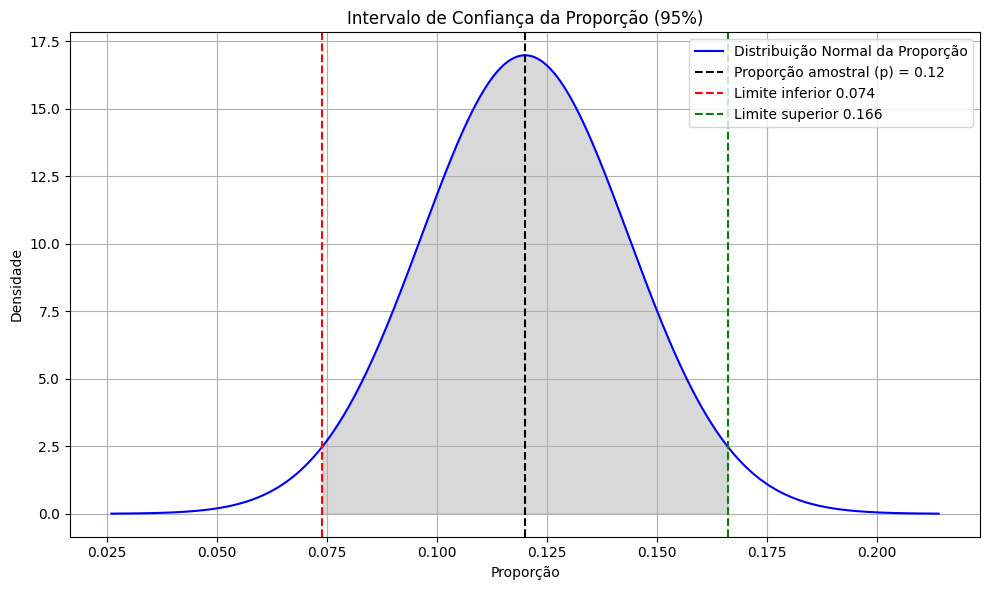

In [180]:
# Cálculo do erro padrão
erro_padrao = math.sqrt((prob * (1 - prob)) / n)

# Cálculo dos limites do intervalo de confiança
limite_inferior = p - z * erro_padrao
limite_superior = p + z * erro_padrao

# Exibição dos valores calculados
print(f"Erro padrão: {erro_padrao:.4f}")
print(f"Intervalo de confiança (95%): [{limite_inferior:.4f}, {limite_superior:.4f}]")

# Plot da distribuição normal com IC
x = np.linspace(p - 4*erro_padrao, p + 4*erro_padrao, 1000)
y = (1 / (erro_padrao * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - p)/erro_padrao)**2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal da Proporção', color='blue')
plt.axvline(p, color='black', linestyle='--', label= f'Proporção amostral (p) = {p}')
plt.axvline(limite_inferior, color='red', linestyle='--', label= f'Limite inferior {limite_inferior:.3f}')
plt.axvline(limite_superior, color='green', linestyle='--', label= f'Limite superior {limite_superior:.3f}')
plt.fill_between(x, y, where=(x >= limite_inferior) & (x <= limite_superior), color='gray', alpha=0.3)

plt.title('Intervalo de Confiança da Proporção (95%)')
plt.xlabel('Proporção')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()